In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from local_utils import *

In [ ]:
def G(sigma, x, y):
    gaussian = (1/(2*np.pi*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    return gaussian

def G_discrete(sigma, n):
    l = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            l[i,j] = G(sigma, (i-(n-1)/2),(j-(n-1)/2))
    return l

def G_discrete_normalise(sigma, n):
    l = G_discrete(sigma, n)
    return l/np.sum(l)

# $-\frac{1}{\pi \sigma^4} [1- \frac{(x^2+ y^2)}{2\sigma^2}] \exp(\frac{- (x^2+ y^2)}{2\sigma^2}) $

In [2]:
def LoG(sigma, x, y):
    laplace = (-1/(np.pi*sigma**4))*(1-(x**2+y**2)/(2*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    return laplace

def LoG_discrete(sigma, n):
    l = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            l[i,j] = LoG(sigma, (i-(n-1)/2),(j-(n-1)/2))
    return l

def LoG_discrete_centred(sigma, n, centre):
    return np.round(LoG_discrete(sigma, n)*(-centre/LoG(sigma,0,0))) 


In [10]:
LoG(1,0,0), LoG_discrete(1, 3), np.sum(LoG_discrete(1, 3))

(-0.3183098861837907,
 array([[-0.        , -0.09653235, -0.        ],
        [-0.09653235, -0.31830989, -0.09653235],
        [-0.        , -0.09653235, -0.        ]]),
 -0.7044392967040063)

In [125]:
LoG_discrete_centred(1.0, 9, 1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -1., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [3]:
import pandas as pd
df = pd.read_csv("../with_diffusions_second_search/df_network_analysis_full_topology_with_alienor_mesh_and_diffusion_estimates.csv")
df["index"] = range(df.shape[0])

In [4]:
def load_dataset(path, cont=False):
    if cont:
        with open(f"../{path[:-4]}_2", "rb") as f:
            k_max, params, res = np.load(f, allow_pickle=True)
    else:
        with open(f"../{path}", "rb") as f:
            k_max, params, res = np.load(f, allow_pickle=True)
    (n_val, 
     b_A_val, mu_A_val, V_A_val, K_AA_val, K_AB_val, K_AC_val,
     b_B_val, mu_B_val, V_B_val, K_BA_val, K_BC_val,
     b_C_val, mu_C_val, V_C_val, K_CB_val, K_CC_val) = params
    params = {
              'D_A':0.01,
              'D_B':1.0,
              'n':n_val, 
              'b_A':b_A_val, 
              'mu_A':mu_A_val, 
              'V_A':V_A_val,
              'K_AA':K_AA_val, 
              'K_AB':K_AB_val,  
              'K_AC':K_AC_val,
              'b_B':b_B_val, 
              'mu_B':mu_B_val, 
              'V_B':V_B_val,
              'K_BA':K_BA_val, 
              'K_BC':K_BC_val,  
              'b_C':b_C_val, 
              'mu_C':mu_C_val, 
              'V_C':V_C_val,
              'K_CB':K_CB_val, 
              'K_CC':K_CC_val
             }
           
    return (params, res, k_max)


10 outputs_second_search/solution_10_10_103.npy
index                                                              10
type                                                             spot
estimated_params    (0.9998756872706421, 6.797751713112303, 10.097...
original_params                         (1.0, 100.0, 10.0, 5.0, 10.0)
euclidian_dist                                              93.329735
search_alg                                                   L_BFGS_B
Has_closer_est                                                   True
Name: 10, dtype: object
bad_estimates                          2
list_of_bad_estimates    ('V_C', 'K_CC')
Name: 10, dtype: object
bad_estimates_A_alienor_mesh                                  2
list_of_bad_estimates_A_alienor_mesh             ('D_A', 'b_A')
bad_estimates_B_alienor_mesh                                  3
list_of_bad_estimates_B_alienor_mesh     ('b_B', 'V_B', 'K_CB')
bad_estimates_C_alienor_mesh                                  3
list_of_bad_

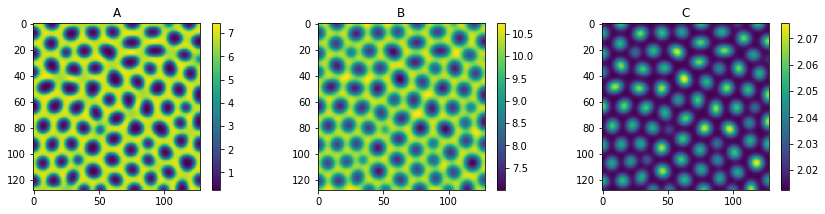

In [135]:
index = 10#2

print(index, df.iloc[index]["path"])
print(df.iloc[index][df.columns[40:47]])
print(df.iloc[index][df.columns[63:65]])
print(df.iloc[index][df.columns[-6:]])
params, res, k_max = load_dataset(df.iloc[index]["path"])

def to(arr):
    return arr.reshape(128, 128) 

def reshape(arr, steps=1):
    T = arr.shape[0]
    ret = np.array([
        [to(arr[i, 0, :]), to(arr[i, 1, :]), to(arr[i, 2, :])]
        for i in range(T-steps, T)
    ])
    return np.einsum("tcxy -> cxyt", ret)


plot_n_im([to(res[-1, 0, :]), to(res[-1, 1, :]), to(res[-1, 2, :])], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

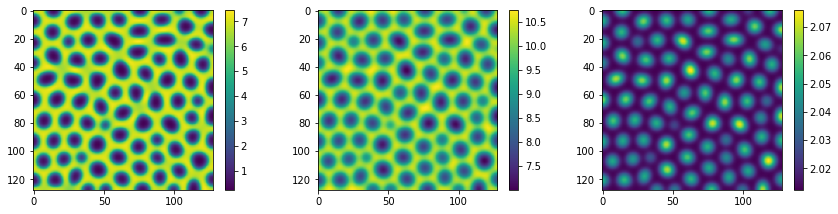

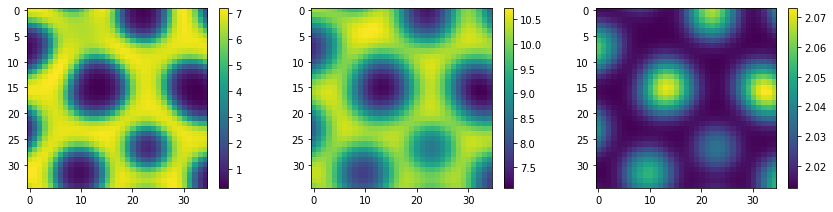

In [136]:
T=1
L=10


data = reshape(res, T)#res_128_1[:, :, :, np.newaxis]
nodes_n = data.shape[0]
node_names = ["A", "B", "C"]
x_size = data.shape[1]
y_size = data.shape[2]

##########################################
# Create a mesh that is the centers of the
# original mesh
x_size -= 1
y_size -= 1

dxdy = L**2/((x_size-1)*(y_size-1))
N = x_size*y_size    
t_star = np.arange(T, T+1)

##########################
# select a subset of data
#t_star = t_star[-4:]
#T = len(t_star)
#data = data[:, :, :, -4::]
x_slice = slice(65, 100, 1)
y_slice = slice(65, 100, 1)


# x_slice = slice(0, x_size, 1)
# y_slice = slice(0, x_size, 1)


x_range = L * np.linspace(0, 1, x_size)[x_slice]
y_range = L * np.linspace(0, 1, y_size)[y_slice]

block_x = x_range.shape[0]
block_y = y_range.shape[0]

A = data[0, :, :, -1]
B = data[1, :, :, -1]
C = data[2, :, :, -1]

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(1,3, i+1)
    plt.imshow(data[i, :, :, -1])
    plt.colorbar()
plt.tight_layout();plt.show()

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(1,3, i+1)
    plt.imshow(data[i, x_slice, y_slice, -1])
    plt.colorbar()
plt.tight_layout();plt.show()

In [26]:
c_xx =  np.array([[second_order_derivatives((x_size,y_size), data[c, ..., t])[0]#/dxdy 
                        for t in range(data.shape[3])]
                        for c in range(data.shape[0])
                       ])
c_xx = np.einsum("ctij -> cijt", c_xx)
c_yy = np.array([[second_order_derivatives((x_size,y_size), data[c, ..., t])[1]#/dxdy 
                    for t in range(data.shape[3])]
                    for c in range(data.shape[0])
                   ])
c_yy = np.einsum("ctij -> cijt", c_yy)
########################################################
actual_A_der = ( c_xx[0,x_slice, y_slice  , -1] + c_yy[0,x_slice, y_slice  , -1])
actual_B_der = ( c_xx[1,x_slice, y_slice  , -1] + c_yy[1,x_slice, y_slice  , -1])

In [48]:
sigma = .75
A_diff = ndimage.gaussian_laplace(A, sigma)[x_slice, y_slice]#[1:-1, 1:-1]
B_diff = ndimage.gaussian_laplace(B, sigma)[x_slice, y_slice]#[1:-1, 1:-1]

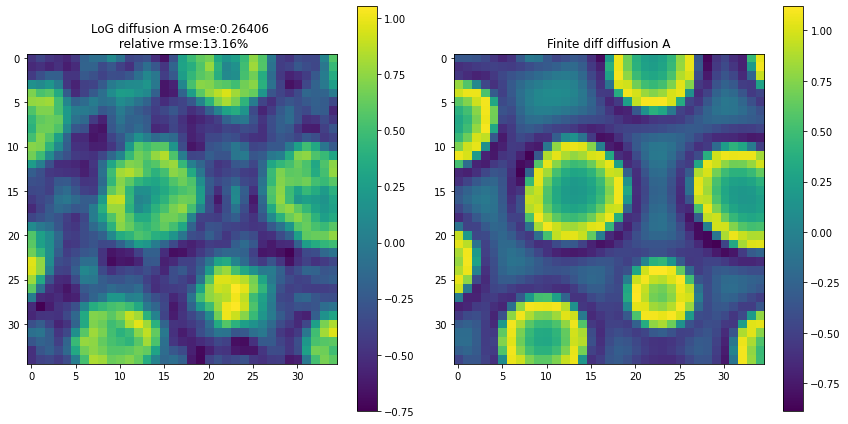

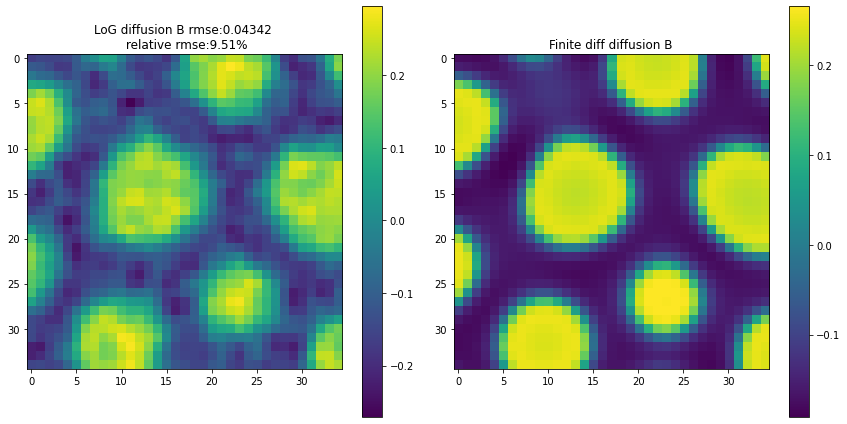

In [91]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))


    
a_A_der_temp = actual_A_der#[1:-1,1:-1]
a_B_der_temp = actual_B_der#[1:-1,1:-1]
rmse1 = rmse(A_diff,  a_A_der_temp)
amp1 = np.max(a_A_der_temp) - np.min(a_A_der_temp)
rmse2 = rmse(B_diff,  a_B_der_temp)
amp2 = np.max(a_B_der_temp) - np.min(a_B_der_temp)
plot_n_im([A_diff,  a_A_der_temp],
          [f"LoG diffusion A rmse:{rmse1:.5f} \n relative rmse:{100*rmse1/amp1:.2f}%", 
           "Finite diff diffusion A"],          
          figsize=(12, 6)); plt.tight_layout()
plot_n_im([B_diff,  a_B_der_temp],
          [f"LoG diffusion B rmse:{rmse2:.5f} \n relative rmse:{100*rmse2/amp2:.2f}%",
           "Finite diff diffusion B"],          
          figsize=(12, 6)); plt.tight_layout()  

In [52]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))


amp1 = np.max(actual_A_der) - np.min(actual_A_der)
amp2 = np.max(actual_B_der) - np.min(actual_B_der)

sigmas = np.linspace(.6, 1.2, 100)
rmse_A = np.zeros_like(sigmas)
rmse_B = np.zeros_like(sigmas)
relative_rmse_A = np.zeros_like(sigmas)
relative_rmse_B = np.zeros_like(sigmas)


for i, sigma in enumerate(sigmas):
    A_diff = ndimage.gaussian_laplace(A, sigma)[x_slice, y_slice]
    B_diff = ndimage.gaussian_laplace(B, sigma)[x_slice, y_slice]
    rmse1 = rmse(A_diff,  actual_A_der)    
    rmse_A[i] = rmse1    
    relative_rmse_A[i] = 100*rmse1/amp1
    rmse2 = rmse(B_diff,  actual_B_der)
    rmse_B[i] = rmse2    
    relative_rmse_B[i] = 100*rmse2/amp2

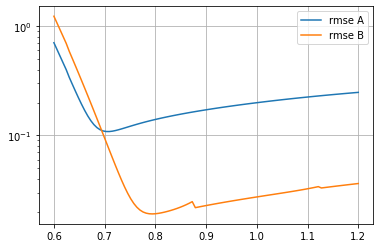

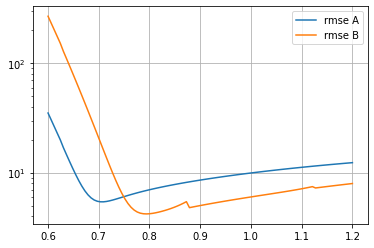

In [56]:
plt.plot(sigmas, rmse_A, label="rmse A")
plt.plot(sigmas, rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

plt.plot(sigmas, relative_rmse_A, label="rmse A")
plt.plot(sigmas, relative_rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

In [132]:
sigmas = np.linspace(.5, 2, 100)
rmse_A = np.zeros_like(sigmas)
rmse_B = np.zeros_like(sigmas)
relative_rmse_A = np.zeros_like(sigmas)
relative_rmse_B = np.zeros_like(sigmas)

relative_noise = 0.1
for i, sigma in enumerate(sigmas):
    A_noise = A + np.random.normal(0, amp1*relative_noise, size=A.shape)
    A_diff = ndimage.gaussian_laplace(A_noise, sigma)[x_slice, y_slice]
    B_noise = B + np.random.normal(0, amp2*relative_noise, size=B.shape)
    B_diff = ndimage.gaussian_laplace(B_noise, sigma)[x_slice, y_slice]
    rmse1 = rmse(A_diff,  actual_A_der)    
    rmse_A[i] = rmse1    
    relative_rmse_A[i] = 100*rmse1/amp1
    rmse2 = rmse(B_diff,  actual_B_der)
    rmse_B[i] = rmse2    
    relative_rmse_B[i] = 100*rmse2/amp2

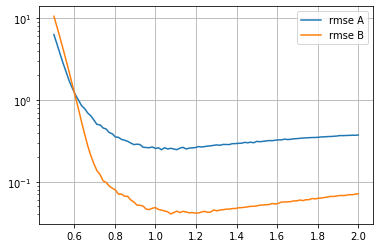

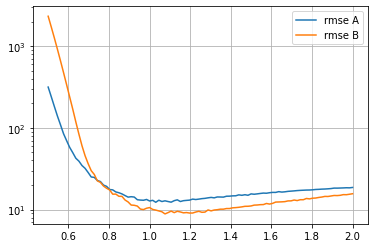

In [131]:
plt.plot(sigmas, rmse_A, label="rmse A")
plt.plot(sigmas, rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

plt.plot(sigmas, relative_rmse_A, label="rmse A")
plt.plot(sigmas, relative_rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

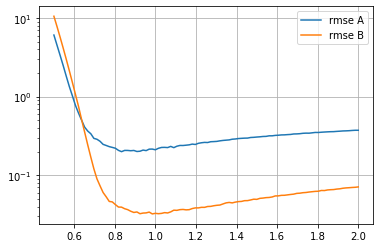

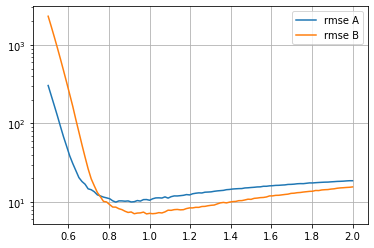

In [133]:
plt.plot(sigmas, rmse_A, label="rmse A")
plt.plot(sigmas, rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

plt.plot(sigmas, relative_rmse_A, label="rmse A")
plt.plot(sigmas, relative_rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

In [70]:
amp1*relative_noise

0.40131177236050597

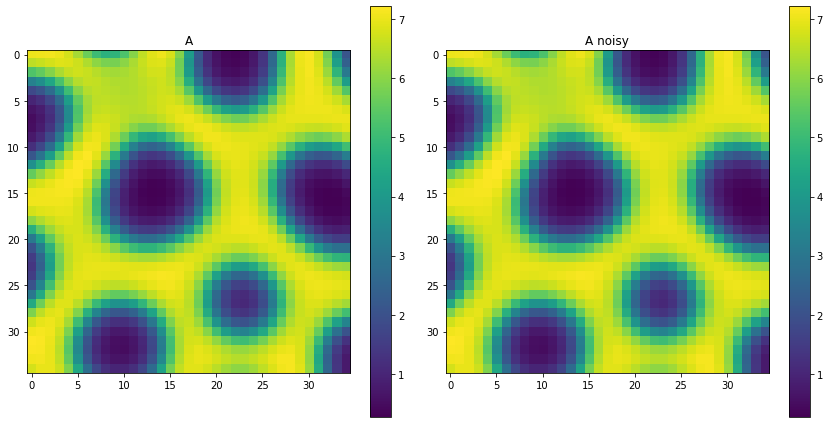

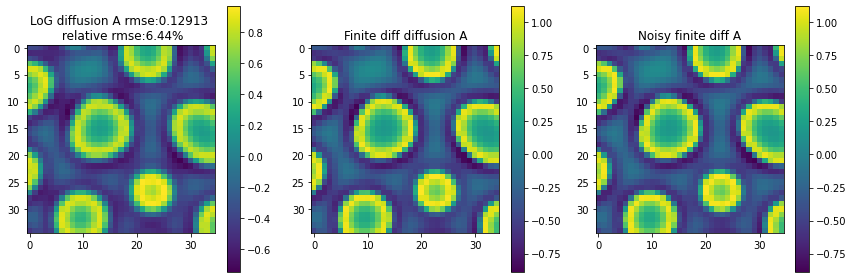

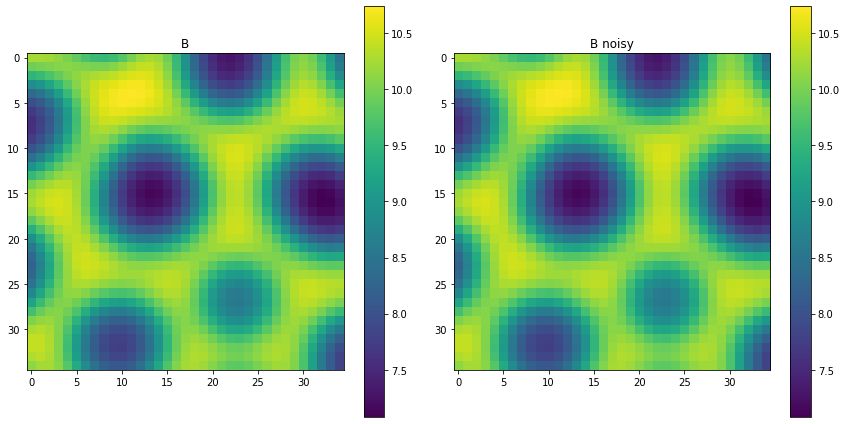

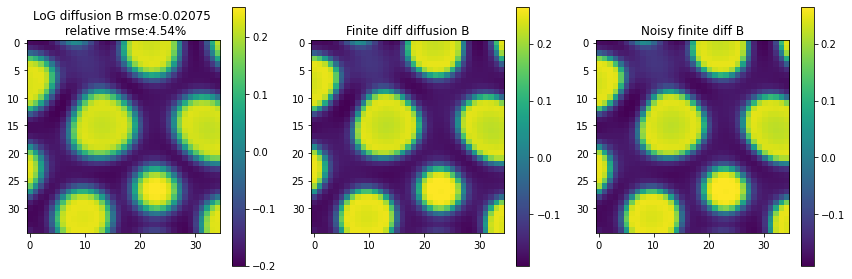

In [122]:

relative_noise = 0.0
sigma=0.77
A_noise = A + np.random.normal(0, amp1*relative_noise, size=A.shape)
A_diff = ndimage.gaussian_laplace(A_noise, sigma)[x_slice, y_slice]
B_noise = B + np.random.normal(0, amp2*relative_noise, size=B.shape)
B_diff = ndimage.gaussian_laplace(B_noise, sigma)[x_slice, y_slice]

rmse1 = rmse(A_diff,  actual_A_der)
rmse2 = rmse(B_diff,  actual_B_der)


data_out = np.stack([A_noise, B_noise, C])[..., np.newaxis]
c_xx_out =  np.array([[second_order_derivatives((128, 128), data_out[c, ..., t])[0]
                    for t in range(data_out.shape[3])]
                    for c in range(data_out.shape[0])
                   ])
c_xx_out = np.einsum("ctij -> cijt", c_xx_out)
c_yy_out = np.array([[second_order_derivatives((128, 128), data_out[c, ..., t])[1]
                    for t in range(data_out.shape[3])]
                    for c in range(data_out.shape[0])
                   ])
c_yy_out = np.einsum("ctij -> cijt", c_yy_out)

A_finit_diff_der = ( c_xx_out[0,:, :  , -1] + c_yy_out[0,:, :  , -1])[x_slice, y_slice]
B_finit_diff_der = ( c_xx_out[1,:, :  , -1] + c_yy_out[1,:, :  , -1])[x_slice, y_slice]


plot_n_im([A[x_slice, y_slice], A_noise[x_slice, y_slice],],
          ["A", "A noisy"],          
          figsize=(12, 6)); plt.tight_layout()
plot_n_im([A_diff, actual_A_der, A_finit_diff_der],
          [f"LoG diffusion A rmse:{rmse1:.5f} \n relative rmse:{100*rmse1/amp1:.2f}%", 
           "Finite diff diffusion A", "Noisy finite diff A"],          
          figsize=(12, 4)); plt.tight_layout()
plot_n_im([B[x_slice, y_slice], B_noise[x_slice, y_slice],],
          ["B", "B noisy"],          
          figsize=(12, 6)); plt.tight_layout()
plot_n_im([B_diff,  actual_B_der, B_finit_diff_der],
          [f"LoG diffusion B rmse:{rmse2:.5f} \n relative rmse:{100*rmse2/amp2:.2f}%",
           "Finite diff diffusion B", "Noisy finite diff B"],          
          figsize=(12, 4)); plt.tight_layout()  


In [101]:
data_out.shape

(3, 128, 128, 1)

In [137]:
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


data2 = np.stack([[ (ndimage.convolve(data[i, :, :, j], kernel)/4)[x_slice, y_slice] 
                        for j in  range(data.shape[3])]
                        for i in  range(data.shape[0])])
data2 = np.einsum("ctxy -> cxyt", data2)

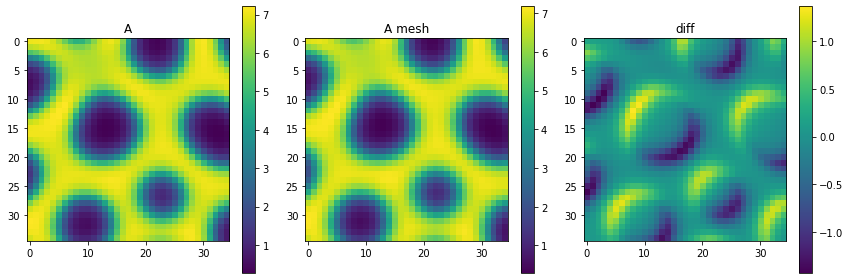

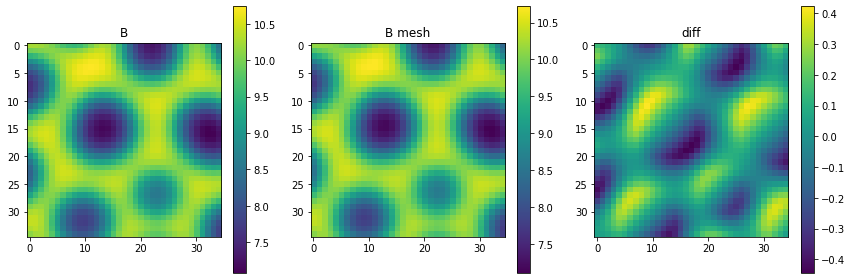

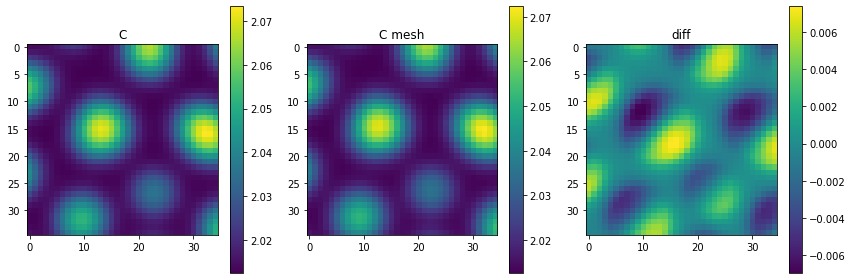

In [141]:
plot_n_im([data[0,:,:,-1][x_slice, y_slice], data2[0,:,:,-1], data[0,:,:,-1][x_slice, y_slice]-data2[0,:,:,-1]],
          ["A", "A mesh", "diff"],          
          figsize=(12, 4)); plt.tight_layout()
plot_n_im([data[1,:,:,-1][x_slice, y_slice], data2[1,:,:,-1], data[1,:,:,-1][x_slice, y_slice]-data2[1,:,:,-1]],
          ["B", "B mesh", "diff"],          
          figsize=(12, 4)); plt.tight_layout()
plot_n_im([data[2,:,:,-1][x_slice, y_slice], data2[2,:,:,-1], data[2,:,:,-1][x_slice, y_slice]-data2[2,:,:,-1]],
          ["C", "C mesh", "diff"],          
          figsize=(12, 4)); plt.tight_layout()

In [216]:
c_xx_out =  np.array([[second_order_derivatives((128, 128), data[c, ..., t])[0]
                for t in range(data.shape[3])]
                for c in range(data.shape[0])
               ])
c_xx_out = np.einsum("ctij -> cijt", c_xx_out)
c_yy_out = np.array([[second_order_derivatives((128, 128), data[c, ..., t])[1]
                    for t in range(data.shape[3])]
                    for c in range(data.shape[0])
                   ])
c_yy_out = np.einsum("ctij -> cijt", c_yy_out)

A_diffusion = (c_xx_out[0, :,:,-1] + c_yy_out[0, :,:,-1])[x_slice, y_slice] 
B_diffusion = (c_xx_out[1, :,:,-1] + c_yy_out[1, :,:,-1])[x_slice, y_slice] 

c_LoG = np.array([[ndimage.gaussian_laplace(data2[i, :,:, j], sigma=.75)
                 for i in range(data2.shape[0])]
                 for j in range(data2.shape[3])
                 ])
#print(c_LoG.shape)
c_LoG = np.einsum( "tcxy -> txyc", c_LoG) 
#c_LoG = (c_LoG + c_LoG.T)/2

In [217]:
c_LoG.shape, data2.shape, A_diffusion.shape, B_diffusion.shape

((1, 35, 35, 3), (3, 35, 35, 1), (35, 35), (35, 35))

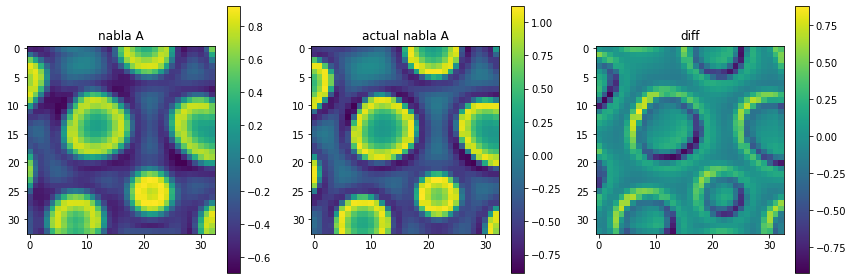

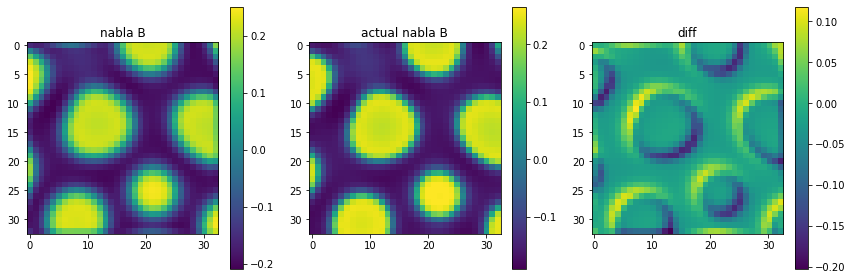

In [218]:
plot_n_im([c_LoG[-1,1:-1,1:-1,0], A_diffusion[1:-1,1:-1], c_LoG[-1,1:-1,1:-1,0]- A_diffusion[1:-1,1:-1]],
          ["nabla A", "actual nabla A", "diff"],          
          figsize=(12, 4)); plt.tight_layout()
plot_n_im([c_LoG[-1,1:-1,1:-1,1], B_diffusion[1:-1,1:-1], c_LoG[-1,1:-1,1:-1,1]- B_diffusion[1:-1,1:-1]],
          ["nabla B", "actual nabla B", "diff"],          
          figsize=(12, 4)); plt.tight_layout()

In [235]:
data.shape, A_diffusion.shape

((3, 128, 128, 1), (35, 35))

In [236]:
sigmas = np.linspace(.5, 1.5, 200)
rmse_A = np.zeros_like(sigmas)
rmse_B = np.zeros_like(sigmas)
relative_rmse_A = np.zeros_like(sigmas)
relative_rmse_B = np.zeros_like(sigmas)




relative_noise = 0.1

amp1 = np.max(A_diffusion) - np.min(A_diffusion)
amp2 = np.max(B_diffusion) - np.min(B_diffusion)
for i, sigma in enumerate(sigmas):
    c_LoG = np.array([[ndimage.gaussian_laplace(data[i, :,:, j], sigma=sigma)[x_slice, y_slice] 
                 for i in range(data.shape[0])]
                 for j in range(data.shape[3])
                 ])
    #print(c_LoG.shape)
    c_LoG = np.einsum( "tcxy -> txyc", c_LoG) 
    A_noise = c_LoG[-1,:,:,0]#A + np.random.normal(0, amp1*relative_noise, size=A.shape)
    #A_diff = ndimage.gaussian_laplace(A_noise, sigma)[x_slice, y_slice]
    
    B_noise = c_LoG[-1,:,:,1]#B + np.random.normal(0, amp2*relative_noise, size=B.shape)
    #B_diff = ndimage.gaussian_laplace(B_noise, sigma)[x_slice, y_slice]
    rmse1 = rmse(A_diffusion,  A_noise)    
    rmse_A[i] = rmse1    
    relative_rmse_A[i] = 100*rmse1/amp1
    rmse2 = rmse(B_diffusion,  B_noise)
    rmse_B[i] = rmse2    
    relative_rmse_B[i] = 100*rmse2/amp2

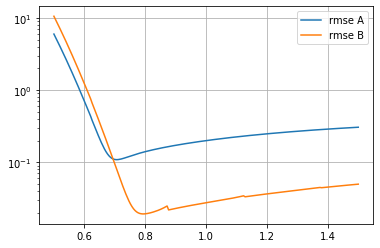

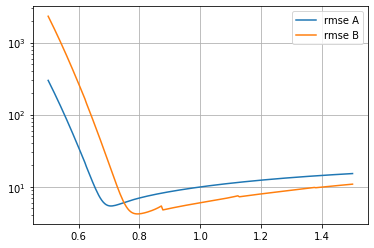

In [237]:
plt.plot(sigmas, rmse_A, label="rmse A")
plt.plot(sigmas, rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

plt.plot(sigmas, relative_rmse_A, label="rmse A")
plt.plot(sigmas, relative_rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

In [312]:
data2.shape

(3, 35, 35, 1)

In [509]:
# kernel2 =np.array([[1/2, 1, 1/2],
#                    [1, -6, 1],
#                    [1/2, 1, 1/2]])

data3 = data2.copy()

amp1 = np.max(data3[0 :,:,:]) - np.min(data3[0 :,:,:])
amp2 = np.max(data3[1 :,:,:]) - np.min(data3[1 :,:,:])

relative_noise = 0.05
# data3[0, :,:,:] += np.random.normal(0, amp1*relative_noise, size=data3[0, :,:,:].shape)
# data3[1, :,:,:] += np.random.normal(0, amp2*relative_noise, size=data3[1, :,:,:].shape)
data3[0, :,:,:] += np.random.normal(0,
                                    np.abs(data3[0, :,:,:])*relative_noise,
                                    size=data3[0, :,:,:].shape)

data3[1, :,:,:] += np.random.normal(0,
                                    np.abs(data3[1, :,:,:])*relative_noise,
                                    size=data3[1, :,:,:].shape)

g_kernel = G_discrete_normalise(0.8, 5)
#g_kernel = G_discrete_normalise(1.2, 3)
data4 = np.stack([[ (ndimage.convolve(data3[i, :, :, j], g_kernel))#[x_slice, y_slice] 
                        for j in  range(data3.shape[3])]
                        for i in  range(data3.shape[0])])
data4 = np.einsum("ctxy -> cxyt", data4)


s2 = 2*np.sqrt(2)
kernel2 =np.array([[1/s2, 1/4, 1/s2],
                   [1/4, -1 - 4/s2, 1/4],
                   [1/s2, 1/4, 1/s2]])

data5 = np.stack([[ (ndimage.convolve(data4[i, :, :, j], kernel2))#[x_slice, y_slice] 
                        for j in  range(data4.shape[3])]
                        for i in  range(data4.shape[0])])
data5 = np.einsum("ctxy -> cxyt", data5)

c_LoG = np.array([[ndimage.gaussian_laplace(data4[i, :,:, j], sigma=0.7)
                 for i in range(data4.shape[0])]
                 for j in range(data4.shape[3])
                 ])

c_LoG = np.einsum("ctxy -> cxyt", c_LoG)

c_LoG_direct = np.array([[ndimage.gaussian_laplace(data3[i, :,:, j], sigma=0.7)
                 for i in range(data3.shape[0])]
                 for j in range(data3.shape[3])
                 ])

c_LoG_direct = np.einsum("ctxy -> cxyt", c_LoG_direct)


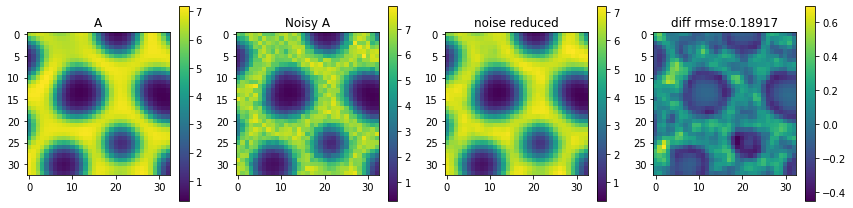

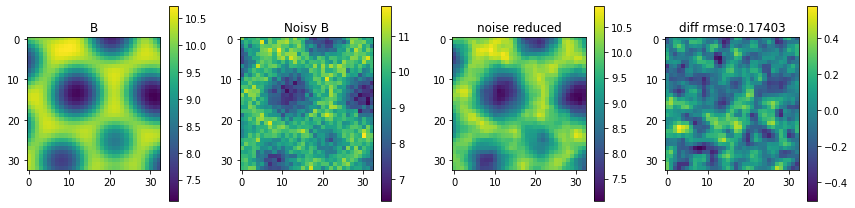

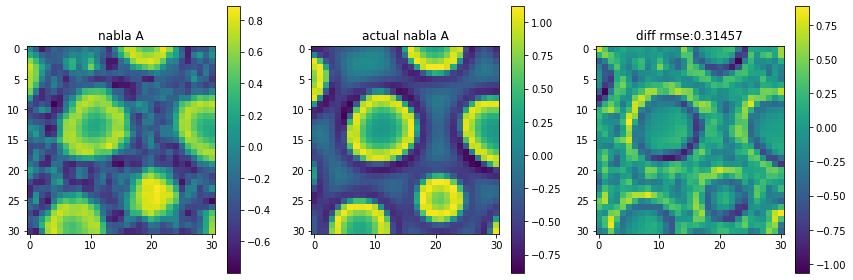

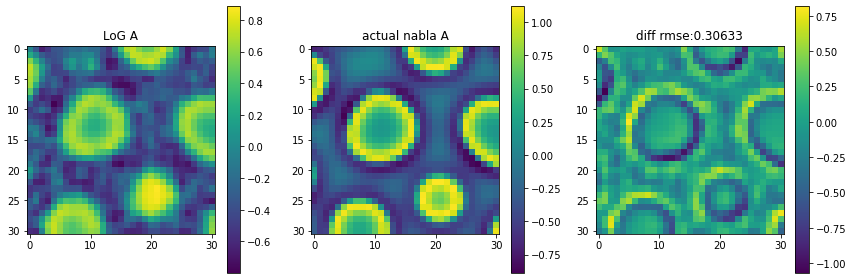

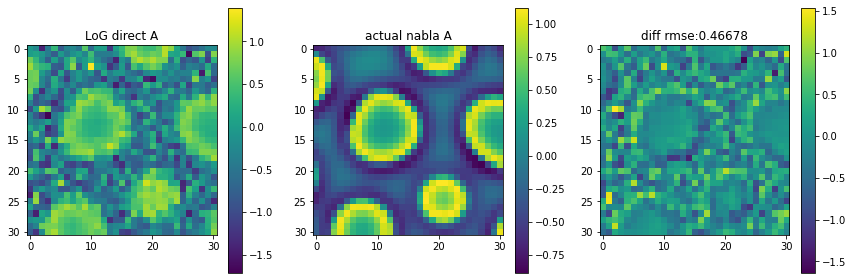

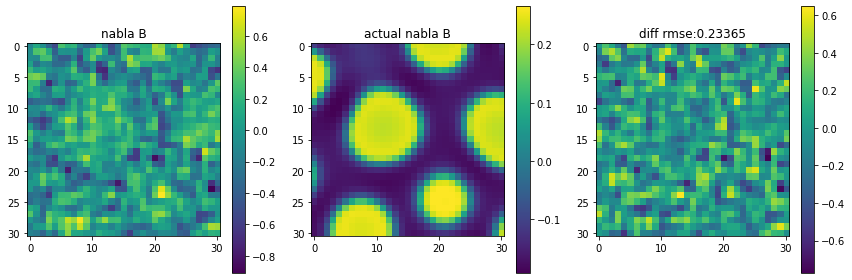

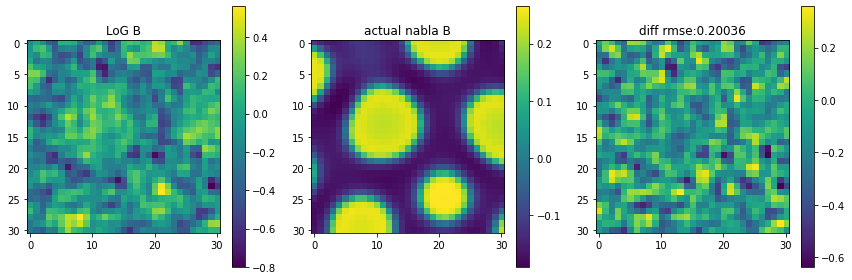

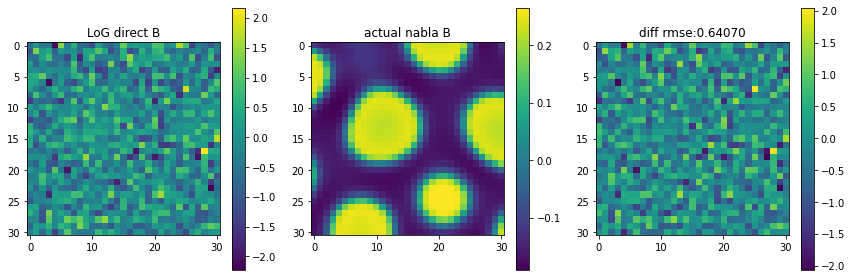

In [510]:
rmse1=rmse(data2[0,1:-1,1:-1,-1], data4[0,1:-1,1:-1,-1])
plot_n_im([data2[0,1:-1,1:-1,-1], data3[0,1:-1,1:-1,-1], data4[0,1:-1,1:-1,-1], data2[0,1:-1,1:-1,-1]- data4[0,1:-1,1:-1,-1]],
          ["A", "Noisy A", "noise reduced" ,f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 3)); plt.tight_layout()
rmse1=rmse(data2[1,1:-1,1:-1,-1], data4[1,1:-1,1:-1,-1])
plot_n_im([data2[1,1:-1,1:-1,-1], data3[1,1:-1,1:-1,-1], data4[1,1:-1,1:-1,-1], data2[1,1:-1,1:-1,-1]- data4[1,1:-1,1:-1,-1]],
          ["B", "Noisy B", "noise reduced", f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 3)); plt.tight_layout()

rmse1=rmse(data5[0,2:-2,2:-2,-1], A_diffusion[2:-2,2:-2])
plot_n_im([data5[0,2:-2,2:-2,-1], A_diffusion[2:-2,2:-2], data5[0,2:-2,2:-2,-1]- A_diffusion[2:-2,2:-2]],
          ["nabla A", "actual nabla A", f"diff rmse:{rmse1:.5f}"],          
          figsize=(12, 4)); plt.tight_layout()
rmse1=rmse(c_LoG[-1,2:-2,2:-2,0], A_diffusion[2:-2,2:-2])
plot_n_im([c_LoG[-1,2:-2,2:-2,0], A_diffusion[2:-2,2:-2], c_LoG[-1,2:-2,2:-2,0]- A_diffusion[2:-2,2:-2]],
          ["LoG A", "actual nabla A", f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 4)); plt.tight_layout()
rmse1=rmse(c_LoG_direct[-1,2:-2,2:-2,0], A_diffusion[2:-2,2:-2])
plot_n_im([c_LoG_direct[-1,2:-2,2:-2,0], A_diffusion[2:-2,2:-2], c_LoG_direct[-1,2:-2,2:-2,0]- A_diffusion[2:-2,2:-2]],
          ["LoG direct A", "actual nabla A", f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 4)); plt.tight_layout()
rmse1=rmse(data5[1,2:-2,2:-2,-1], B_diffusion[2:-2,2:-2])
plot_n_im([data5[1,2:-2,2:-2,-1], B_diffusion[2:-2,2:-2], data5[1,2:-2,2:-2,-1]- B_diffusion[2:-2,2:-2]],
          ["nabla B", "actual nabla B", f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 4)); plt.tight_layout()
rmse1=rmse(c_LoG[-1,2:-2,2:-2,1], B_diffusion[2:-2,2:-2])
plot_n_im([c_LoG[-1,2:-2,2:-2,1], B_diffusion[2:-2,2:-2], c_LoG[-1,2:-2,2:-2,1]- B_diffusion[2:-2,2:-2]],
          ["LoG B", "actual nabla B", f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 4)); plt.tight_layout()
rmse1=rmse(c_LoG_direct[-1,2:-2,2:-2,1], B_diffusion[2:-2,2:-2])
plot_n_im([c_LoG_direct[-1,2:-2,2:-2,1], B_diffusion[2:-2,2:-2], c_LoG_direct[-1,2:-2,2:-2,1]- B_diffusion[2:-2,2:-2]],
          ["LoG direct B", "actual nabla B", f"diff rmse:{rmse1:.5f}"],
          figsize=(12, 4)); plt.tight_layout()

In [414]:
c_LoG.shape, 0.22, .162

((1, 35, 35, 3), 0.22, 0.162)

In [415]:
data5.shape, B_diffusion.shape

((3, 35, 35, 1), (35, 35))

In [252]:
A_diffusion.shape, A_noise.shape

((35, 35), (128, 128))

In [308]:
#sigmas = np.linspace(.5, 1.5, 200)
rmse_A = np.zeros_like(sigmas)
rmse_B = np.zeros_like(sigmas)
relative_rmse_A = np.zeros_like(sigmas)
relative_rmse_B = np.zeros_like(sigmas)


# kernel2 =np.array([[1/4, 1/2, 1/4],
#                    [1/2, -3, 1/2],
#                    [1/4, 1/2, 1/4]])
s2 = 2*np.sqrt(2)
kernel2 =np.array([[1/s2, 1/4, 1/s2],
                   [1/4, -1 - 4/s2, 1/4],
                   [1/s2, 1/4, 1/s2]])

# s2 = 2*np.sqrt(2)
# kernel2 =np.array([[0       , 0   , 1/(4*s2) , 0   , 0],
#                    [0       , 1/s2, 1/4      , 1/s2, 0],
#                    [1/(4*s2), 1/4 , -1 - 5/s2, 1/4 , 1/(4*s2)],
#                    [0       , 1/s2, 1/4      , 1/s2, 0],
#                    [0       , 0   , 1/(4*s2) ,  0  , 0]])


relative_noises = np.linspace(0, .2, 200)

amp1 = np.max(A_diffusion) - np.min(A_diffusion)
amp2 = np.max(B_diffusion) - np.min(B_diffusion)
for i, relative_noise in enumerate(relative_noises):
    
    A_noise = A + np.random.normal(0, amp1*relative_noise, size=A.shape)
    A_diff =  (ndimage.convolve(A_noise, kernel2))[x_slice, y_slice] 
   
    
    B_noise = B + np.random.normal(0, amp2*relative_noise, size=B.shape)
    B_diff =  (ndimage.convolve(B_noise, kernel2))[x_slice, y_slice] 
    rmse1 = rmse(A_diffusion,  A_diff)    
    rmse_A[i] = rmse1    
    relative_rmse_A[i] = 100*rmse1/amp1
    rmse2 = rmse(B_diffusion,  B_diff)
    rmse_B[i] = rmse2    
    relative_rmse_B[i] = 100*rmse2/amp2

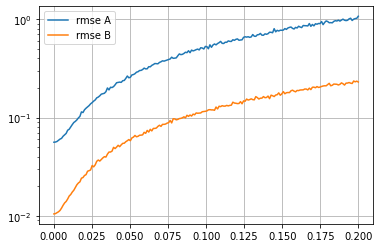

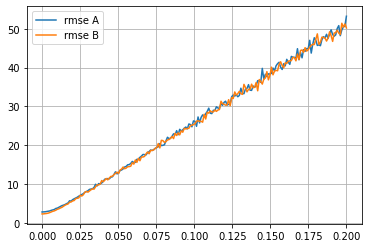

In [309]:
plt.plot(relative_noises, rmse_A, label="rmse A")
plt.plot(relative_noises, rmse_B, label="rmse B")
plt.grid();plt.legend();plt.yscale('log');plt.show()

plt.plot(relative_noises, relative_rmse_A, label="rmse A")
plt.plot(relative_noises, relative_rmse_B, label="rmse B")
plt.grid();plt.legend();#plt.yscale('log');plt.show()

In [348]:
G_discrete_normalise(1, 3)

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [429]:
1/np.sqrt(50)

0.1414213562373095